I followed along this amazing data analyst work from Kaggle https://www.kaggle.com/code/likithagedipudi/genz-slang-evolution-tracker-complete-eda

In [2]:
# Importing the necessary files 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from matplotlib import colormaps # colormaps available for matplotlib

# Set the style of the visualizations 
plt.style.use('seaborn-v0_8-whitegrid') # gives the visualizations a white background witha grid
sns.set_palette("husl") # gives a less intenisty variation between the colors
plt.rcParams['figure.figsize'] = (12,6) # setting the standar size of the figures (12 inches wide 6 inches high)
plt.rcParams['font.size'] = 12 # setting font size to 12

In [3]:
# loading the data 
df = pd.read_csv('genz_slang_usage_2020_2025.csv')
df.head()

,record_id,timestamp,slang_term,term_category,term_meaning,origin_platform,usage_platform,region,user_id,user_age_group,...,intensity_score,sentiment,sentiment_score,ironic_usage,likes,shares,comments,virality_score,is_viral,days_since_emergence
0,0,2020-01-01 01:23:17,simp,insult,someone overly devoted to another person,Reddit,Twitter,California,user_019223,25-30,...,0.603,negative,-0.740,False,18,2,5,0.004,False,153
1,1,2020-01-01 03:21:59,simp,insult,someone overly devoted to another person,Reddit,Twitter,Texas,user_497341,13-17,...,0.603,negative,-0.978,False,24,1,2,0.004,False,153
2,2,2020-01-01 05:31:01,vibe check,social,checking someone's mood/energy,TikTok,TikTok,Canada,user_323563,31-40,...,0.552,positive,0.384,False,121,1,0,0.013,False,92
3,3,2020-01-01 05:35:30,no cap,emphasis,"no lie, for real",Twitter,Twitter,Arizona,user_244857,18-24,...,0.551,neutral,0.167,False,47,2,1,0.006,False,214
4,4,2020-01-01 06:39:57,no cap,emphasis,"no lie, for real",Twitter,Instagram,Arizona,user_421848,13-17,...,0.551,positive,0.874,False,18,0,14,0.006,False,214


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535396 entries, 0 to 535395
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   record_id             535396 non-null  int64  
 1   timestamp             535396 non-null  object 
 2   slang_term            535396 non-null  object 
 3   term_category         535396 non-null  object 
 4   term_meaning          535396 non-null  object 
 5   origin_platform       535396 non-null  object 
 6   usage_platform        535396 non-null  object 
 7   region                535396 non-null  object 
 8   user_id               535396 non-null  object 
 9   user_age_group        535396 non-null  object 
 10  usage_context         535396 non-null  object 
 11  lifecycle_phase       535396 non-null  object 
 12  intensity_score       535396 non-null  float64
 13  sentiment             535396 non-null  object 
 14  sentiment_score       535396 non-null  float64
 15  

In [5]:
# Change timestamp to its correct data type
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 535396 entries, 0 to 535395
Series name: timestamp
Non-Null Count   Dtype         
--------------   -----         
535396 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.1 MB


## Slang Term Analysis 

### Most popular Slang Terms 

In [6]:
top_terms = df['slang_term'].value_counts().head(15) # arranging the 
print(top_terms)

slang_term
slay              19004
based             18541
bussin            17651
rizz              16782
gaslighting       16766
sigma             15630
ate               15626
delulu            15244
snatched          15201
no cap            15107
mid               14642
rent free         14401
brain rot         14324
main character    14324
NPC               14194
Name: count, dtype: int64


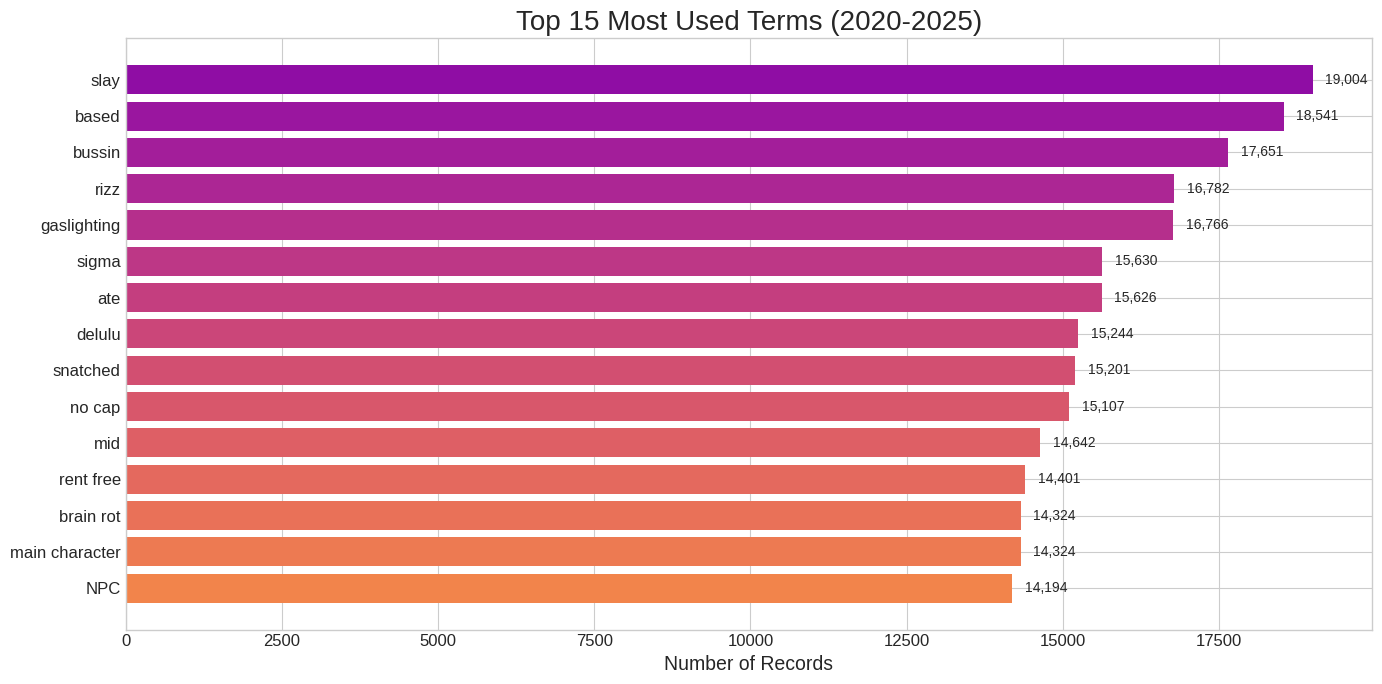

In [7]:
fig, ax = plt.subplots(figsize=(14,7)) # gives the figure's size as 14 inches wide 6 inches high and 
# print(colormaps) # printing out the available color maps available
colors =  plt.cm.plasma_r(np.linspace(0.3,0.7,len(top_terms))) # getting 15 colors from the plasma color map from 30% darkeness to 70% lightness on the scale.
bars = ax.barh(top_terms.index[::-1], top_terms.values[::-1], color=colors) # horizontal bars from leading term to the least in terms of record counts
ax.set_xlabel('Number of Records', fontsize=14) # Label of the x-axis
ax.set_title('Top 15 Most Used Terms (2020-2025)', fontsize=20) # setting the title
# setting the record of each slang next to its bar and at the centre with 
for bar, val in zip(bars, top_terms.values[::-1]):
    ax.text(val + 200, bar.get_y() + bar.get_height()/2, f'{val:,}', va='center', fontsize=10)
plt.tight_layout()
plt.show()

The Leading term is 'Slay' followed closely by 'based'. 
But what do they mean and which category do they fall into ?

### Meaning and Category of the top 15 terms

In [8]:
# creating of a dataframe with only the top slang terms
top_terms_info = df[df['slang_term'].isin(top_terms.index)].copy()

# changing the slang_term column to be categorical, categories being the top terms and ordering it by popularity
top_terms_info['slang_term'] = pd.Categorical(top_terms_info['slang_term'], categories=top_terms.index, ordered=True)

# printing the top slang terms  their meaning and category
print(top_terms_info.sort_values('slang_term')[['slang_term', 'term_meaning', 'term_category']].set_index('slang_term').drop_duplicates().to_string())

                                        term_meaning term_category
slang_term                                                        
slay              doing something exceptionally well      approval
based           authentic, not caring about opinions      approval
bussin                  really good, especially food      approval
rizz             charisma, ability to attract others    attraction
gaslighting               psychological manipulation  manipulation
sigma                     lone wolf personality type      identity
ate                       did really well, killed it      approval
delulu          delusional, unrealistic expectations        insult
snatched               looking really good, on point    appearance
no cap                              no lie, for real      emphasis
mid                        mediocre, nothing special        insult
rent free        constantly thinking about something       emotion
brain rot        consuming too much internet content         h

### Slang Terms distribution by category

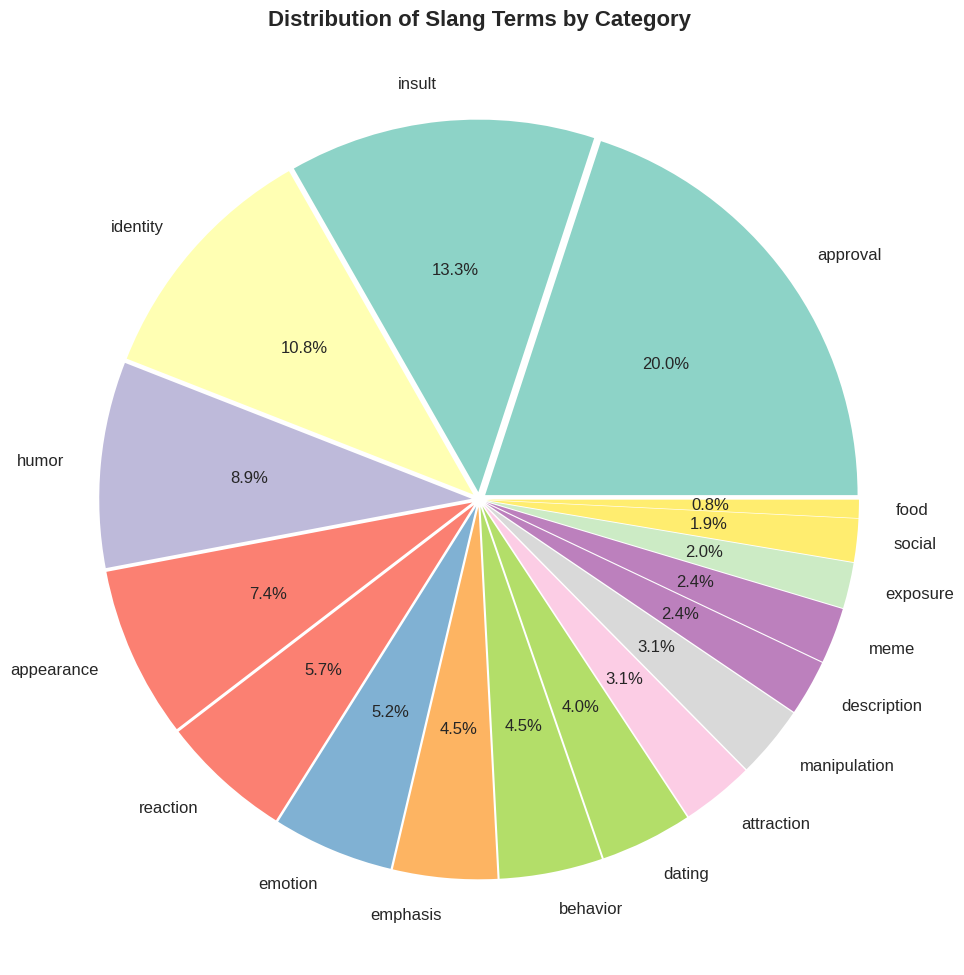


 Slang Terms by Category Summary
term_category
approval        106901
insult           71116
identity         57849
humor            47789
appearance       39797
reaction         30304
emotion          28021
emphasis         24147
behavior         23903
dating           21321
attraction       16782
manipulation     16766
description      12961
meme             12930
exposure         10596
social            9994
food              4219


In [9]:
# counting the total number of records in each category
category_counts = df['term_category'].value_counts() 

# Setting the figure size for the plot 
fig, ax = plt.subplots(figsize=(10,10)) 

# Colors for the wedges (Qualitative colormaps)
colors = plt.cm.Set3(np.linspace(0,1, len(category_counts)))

# Creating the pie chart 

# defining sizes and names 
data = category_counts.values 
names = category_counts.index

# spacing between each slice 
spacing = [0.02] * len(category_counts) # creates a list of the spacing 

# Shows the percentage of each slice
percentage_format = '%1.1f%%'

# Putting it all together to form the pie chart 
wedges, texts, autotext = ax.pie(
    data, 
    labels=names,
    autopct=percentage_format,
    colors=colors,
    explode=spacing
)
ax.set_title('Distribution of Slang Terms by Category', fontsize=16, fontweight='bold')
plt.tight_layout() # adjust the padding so nothing is cut out 
plt.show()

print("\n Slang Terms by Category Summary")
print(category_counts.to_string()) # prints out the category counts in string format



## Rise and Fall of Slang

### Overall Slang Usage over Time 

In [10]:
# creating a column to show the year and month
df['year_month'] = df['timestamp'].dt.to_period('M')

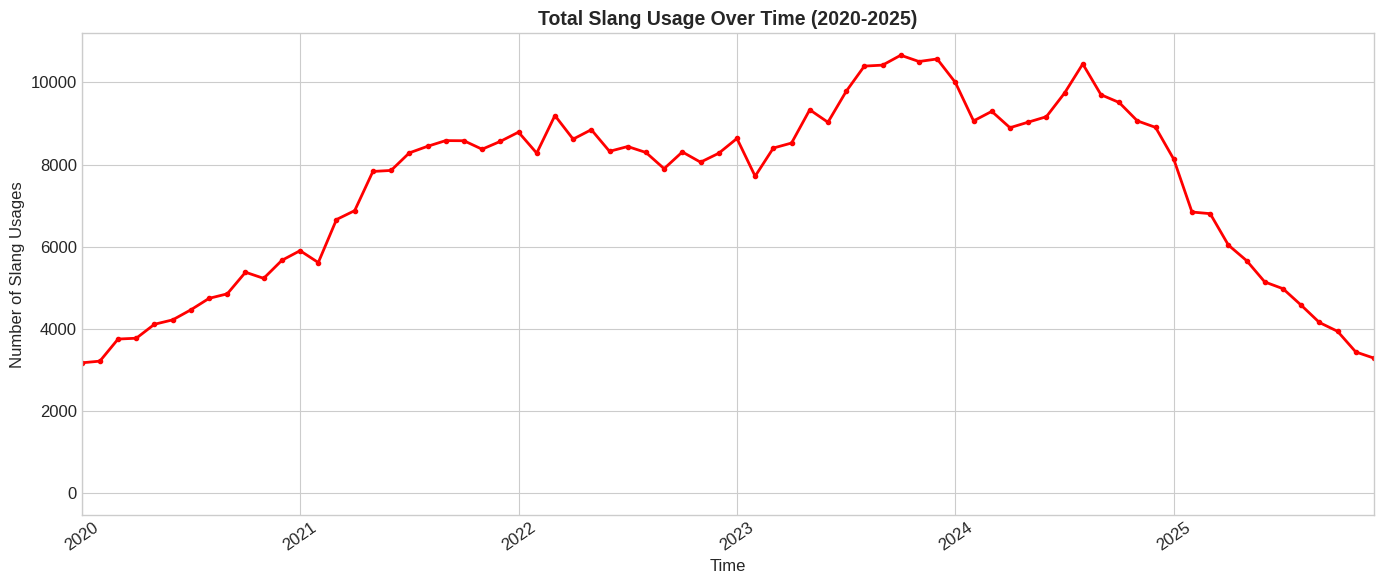

In [11]:
# Drawing a time series chart to show the usage of the terms for every month in each year 

monthly_usage = df.groupby('year_month').size() # groups the records in each month of the year

# the canvas the plot will be in
fig , ax = plt.subplots(figsize=(14,6))

# Drawing the line
monthly_usage.plot(ax=ax, linewidth=2, color='red', marker='o', markersize=3)

# fill the area underneath the curve so that the line graph doesn't appear to start from zero
ax.fill_between(range(len(monthly_usage)), monthly_usage.values)

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Number of Slang Usages', fontsize=12)
ax.set_title('Total Slang Usage Over Time (2020-2025)', fontsize=14, fontweight='bold')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()



In [12]:
# Why is there a dip a constant rise from 2020 then a sudden deep in the words in 2025
df.head()

,record_id,timestamp,slang_term,term_category,term_meaning,origin_platform,usage_platform,region,user_id,user_age_group,...,sentiment,sentiment_score,ironic_usage,likes,shares,comments,virality_score,is_viral,days_since_emergence,year_month
0,0,2020-01-01 01:23:17,simp,insult,someone overly devoted to another person,Reddit,Twitter,California,user_019223,25-30,...,negative,-0.740,False,18,2,5,0.004,False,153,2020-01
1,1,2020-01-01 03:21:59,simp,insult,someone overly devoted to another person,Reddit,Twitter,Texas,user_497341,13-17,...,negative,-0.978,False,24,1,2,0.004,False,153,2020-01
2,2,2020-01-01 05:31:01,vibe check,social,checking someone's mood/energy,TikTok,TikTok,Canada,user_323563,31-40,...,positive,0.384,False,121,1,0,0.013,False,92,2020-01
3,3,2020-01-01 05:35:30,no cap,emphasis,"no lie, for real",Twitter,Twitter,Arizona,user_244857,18-24,...,neutral,0.167,False,47,2,1,0.006,False,214,2020-01
4,4,2020-01-01 06:39:57,no cap,emphasis,"no lie, for real",Twitter,Instagram,Arizona,user_421848,13-17,...,positive,0.874,False,18,0,14,0.006,False,214,2020-01


In [13]:
df.columns

Index(['record_id', 'timestamp', 'slang_term', 'term_category', 'term_meaning',
       'origin_platform', 'usage_platform', 'region', 'user_id',
       'user_age_group', 'usage_context', 'lifecycle_phase', 'intensity_score',
       'sentiment', 'sentiment_score', 'ironic_usage', 'likes', 'shares',
       'comments', 'virality_score', 'is_viral', 'days_since_emergence',
       'year_month'],
      dtype='object')

We can see that a larger percentage of the terms are declining thus explaining the deep. But we can see that some growing. We need to explore this as well.

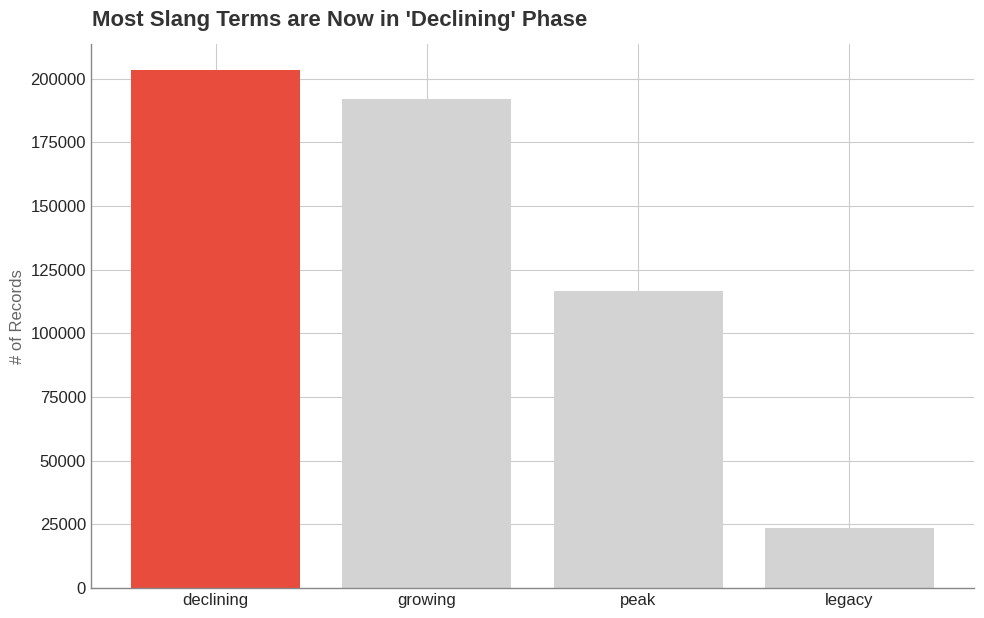

In [ ]:
# 1. Prepare the plot
fig, ax = plt.subplots(figsize=(10, 6))

# 2. Create the 'Neutral' bars (All bars gray)
# This sets a "background" so the red bar will pop
# This "list comprehension" checks every name in your data
colors = ['#E74C3C' if label == 'declining' else '#D3D3D3' for label in life_cycle.index]
ax.bar(life_cycle.index, life_cycle.values, color=colors)


# 4. REMOVE CLUTTER (The "Box")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#888888')
ax.spines['bottom'].set_color('#888888')

# 5. TITLES (The Story)
fig.text(0.1, 1.0, "Most Slang Terms are Now in 'Declining' Phase", 
         fontsize=16, fontweight='bold', color='#333333')
fig.text(0.1, 0.94)

ax.set_ylabel('# of Records', color='#666666')

plt.tight_layout()
plt.show()

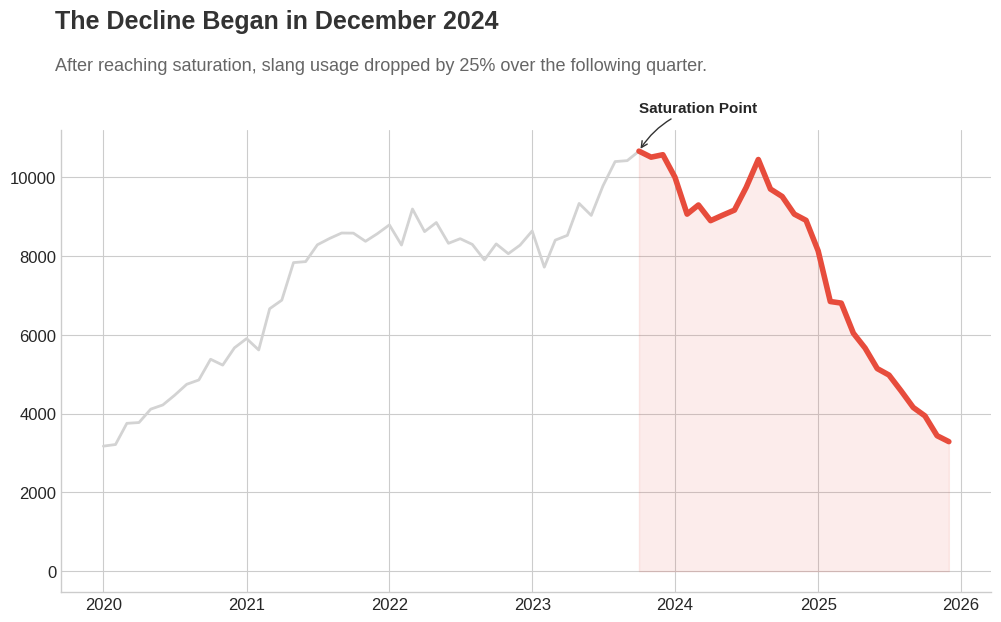

In [37]:
import matplotlib.pyplot as plt

# 1. Setup
fig, ax = plt.subplots(figsize=(12, 6))

# 2. Find the Peak (The turning point)
peak_date = monthly_usage.idxmax()
# Split data into "Before Decline" and "During Decline"
rising = monthly_usage[:peak_date]
declining = monthly_usage[peak_date:]

# 3. Plot the 'Before' (Gray) and the 'Decline' (Red)
# Note: we use to_timestamp() to ensure dates plot correctly
ax.plot(rising.index.to_timestamp(), rising.values, color='#D3D3D3', linewidth=2)
ax.plot(declining.index.to_timestamp(), declining.values, color='#E74C3C', linewidth=4)

# 4. STORYTELLING: The Headline
fig.text(0.12, 1.05, "The Decline Began in December 2024", 
         fontsize=18, fontweight='bold', color='#333333')
fig.text(0.12, 0.98, "After reaching saturation, slang usage dropped by 25% over the following quarter.", 
         fontsize=13, color='#666666')

# 5. HIGHLIGHT THE TURNING POINT
ax.annotate('Saturation Point', 
            xy=(peak_date.to_timestamp(), monthly_usage[peak_date]), 
            xytext=(peak_date.to_timestamp(), monthly_usage[peak_date] + 1000),
            arrowprops=dict(arrowstyle='->', color='#333333', connectionstyle="arc3,rad=.2"),
            fontsize=11, fontweight='bold')

# 6. SHADE THE DECLINE AREA (Optional but effective)
ax.fill_between(declining.index.to_timestamp(), declining.values, 
                color='#E74C3C', alpha=0.1)

# 7. Clean up
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

This explains why most of the Slang Terms are in the declining phase as they started to decline in usage from 2024. 
Why is this decline happening ?